In [12]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/kirill/Projects/nir')
sys.path.append('/home/kirilman/Projects/nir/nir/')
import myutils
import sequence_generator as generator
import numpy as np
import matplotlib.pylab as plt
from pomegranate import *
from HMMClassifier import HHMClassifier
from HMMClassifier import SignalManager
from myutils import rename_path_for_train
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas as pd
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'figure.figsize':[18,6]})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
signal_manager = SignalManager()
signal_manager.read_paramets('/home/kirilman/Projects/nir/nir/notebooks/Different model/config.json')

In [14]:
signal_manager.parameters[0]['N']

1000

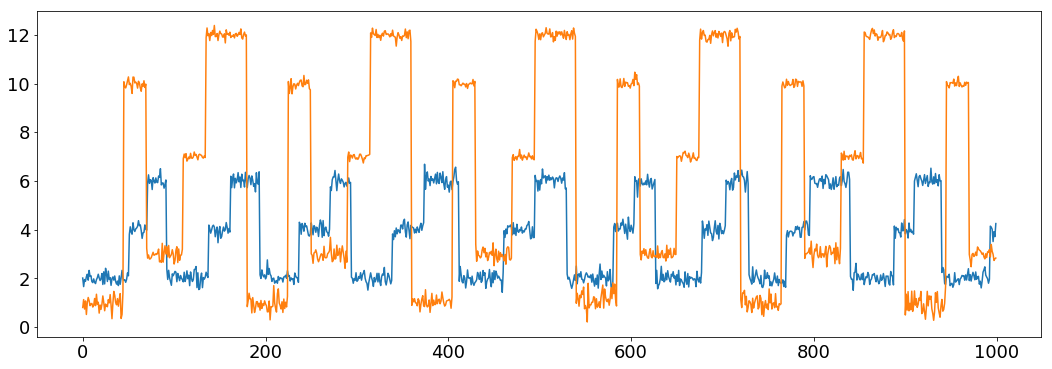

In [191]:
plt.plot(signal_manager.generators[0].sequence)
plt.plot(signal_manager.generators[2].sequence)

In [192]:
hmm_classifier = HHMClassifier()

signal, labels = signal_manager.get_signal_and_path(0)
print(labels[:5])
labels = rename_path_for_train(labels)
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = 3, X = [signal],
                                      labels = [labels], algorithm = 'labeled')
hmm_classifier.add_model(model)

signal, labels = signal_manager.get_signal_and_path(1)
labels = rename_path_for_train(labels)
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = 4, X = [signal],
                                      labels = [labels], algorithm = 'labeled')

hmm_classifier.add_model(model)

signal, labels = signal_manager.get_signal_and_path(2)
labels = rename_path_for_train(labels)
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = 5, X = [signal],
                                      labels = [labels], algorithm = 'labeled')

hmm_classifier.add_model(model)

signal, labels = signal_manager.get_signal_and_path(3)
labels = rename_path_for_train(labels)
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = 4, X = [signal],
                                      labels = [labels], algorithm = 'labeled')

hmm_classifier.add_model(model)

signal, labels = signal_manager.get_signal_and_path(4)
labels = rename_path_for_train(labels)
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = 4, X = [signal],
                                      labels = [labels], algorithm = 'labeled')
hmm_classifier.add_model(model)

[0, 0, 0, 0, 0]


In [193]:
hmm_classifier = HHMClassifier()

signal, labels = signal_manager.get_signal_and_path(0)
labels = rename_path_for_train(labels)
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = 3, X = [signal])
hmm_classifier.add_model(model)

signal, labels = signal_manager.get_signal_and_path(1)
labels = rename_path_for_train(labels)
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = 4, X = [signal])

hmm_classifier.add_model(model)

signal, labels = signal_manager.get_signal_and_path(2)
labels = rename_path_for_train(labels)
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = 5, X = [signal])

hmm_classifier.add_model(model)

signal, labels = signal_manager.get_signal_and_path(3)
labels = rename_path_for_train(labels)
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = 4, X = [signal])

hmm_classifier.add_model(model)

signal, labels = signal_manager.get_signal_and_path(4)
labels = rename_path_for_train(labels)
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = 4, X = [signal])
hmm_classifier.add_model(model)

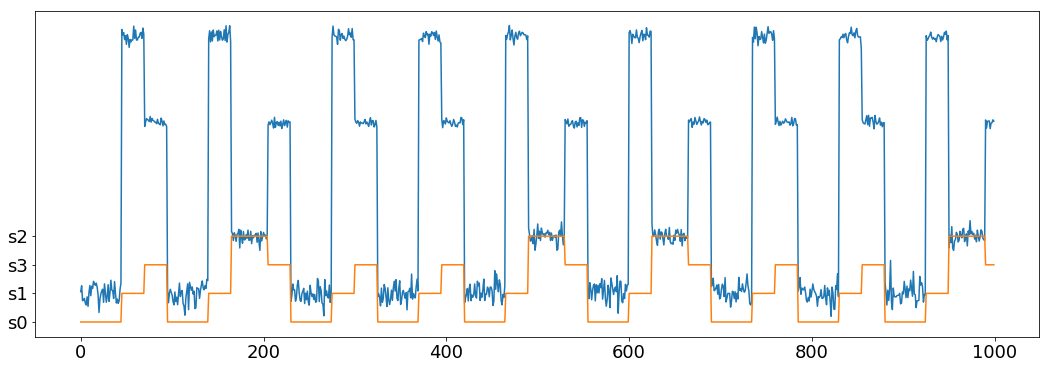

In [194]:
plt.plot(signal)
plt.plot(labels)

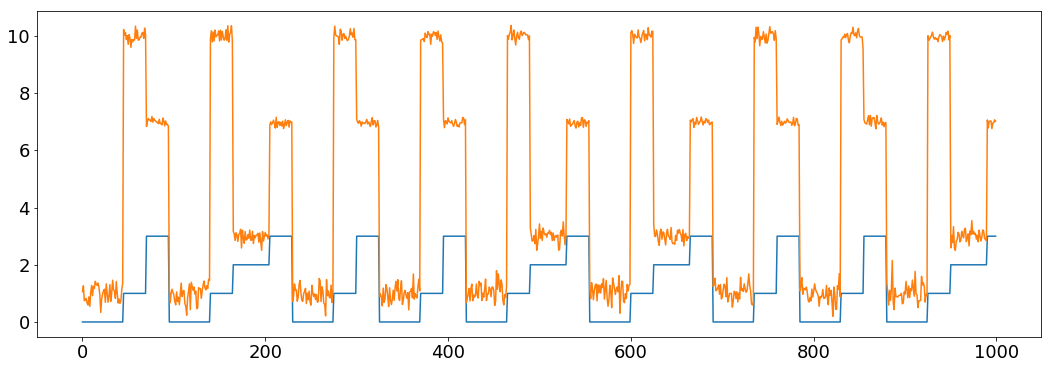

In [195]:
plt.plot(signal_manager.generators[4].path)
plt.plot(signal_manager.generators[4].sequence)

In [196]:
x_test = np.zeros(shape=(500,signal_manager.parameters[0]['N']))
y_test = np.zeros(shape=(500,1))
y_pred = np.zeros(shape=(500,1))

for i in range(500):
    if i >= 0 and i<100:
        x_test[i] = signal_manager.generators[0].get_abnormal_signal(); y_test[i] = 0
    elif i>=100 and i<200:
        x_test[i] = signal_manager.generators[1].get_abnormal_signal(); y_test[i] = 1
    elif i>=200 and i<300:
        x_test[i] = signal_manager.generators[2].get_abnormal_signal(); y_test[i] = 2
    elif i>=300 and i<400:
        x_test[i] = signal_manager.generators[3].get_abnormal_signal(); y_test[i] = 3
    elif i>=400 and i<500:
        x_test[i] = signal_manager.generators[4].get_abnormal_signal(); y_test[i] = 4

In [197]:
x_test = np.zeros(shape=(5000,signal_manager.parameters[0]['N']))
y_test = np.zeros(shape=(5000,1))
y_pred = np.zeros(shape=(5000,1))

for i in range(5000):
    if i >= 0 and i<1000:
        x_test[i] = signal_manager.generators[0].get_abnormal_signal(); y_test[i] = 0
    elif i>=1000 and i<2000:
        x_test[i] = signal_manager.generators[1].get_abnormal_signal(); y_test[i] = 1
    elif i>=2000 and i<3000:
        x_test[i] = signal_manager.generators[2].get_abnormal_signal(); y_test[i] = 2
    elif i>=3000 and i<4000:
        x_test[i] = signal_manager.generators[3].get_abnormal_signal(); y_test[i] = 3
    elif i>=4000 and i<5000:
        x_test[i] = signal_manager.generators[4].get_abnormal_signal(); y_test[i] = 4

In [198]:
log_probability = np.zeros(shape=(5000,len(signal_manager.generators)))
for i,x in enumerate(x_test):
    log_probability[i], y_pred[i] = hmm_classifier.get_log_likelihood(x)

In [199]:
np.mean(y_pred == y_test)

0.9454

In [200]:
frame_lp = pd.DataFrame(log_probability)
frame_lp.shape

(5000, 5)

In [201]:
frame_lp

,0,1,2,3,4
0,-5.694158,-19497.364211,-21215.348776,-22176.151159,-18268.900375
1,-15.332999,-21198.253536,-23098.669778,-24208.190621,-19620.992664
2,-31.820813,-21147.206348,-23072.085319,-24161.782342,-19574.426466
3,-4.676131,-20099.018463,-21701.445150,-22775.669446,-18785.072138
4,5.815460,-23473.720125,-24704.749706,-26476.139188,-21594.497429
5,-4.930774,-21089.936786,-23036.208462,-24094.547393,-19517.410627
6,39.766405,-21216.928926,-23090.382958,-24313.831070,-19636.333147
7,2.615125,-23460.428027,-24693.945836,-26462.812586,-21582.978878
8,-10.847087,-20058.359165,-21665.485307,-22731.170417,-18743.077288
9,-12.363562,-21121.672676,-23035.762962,-24125.409093,-19542.623348


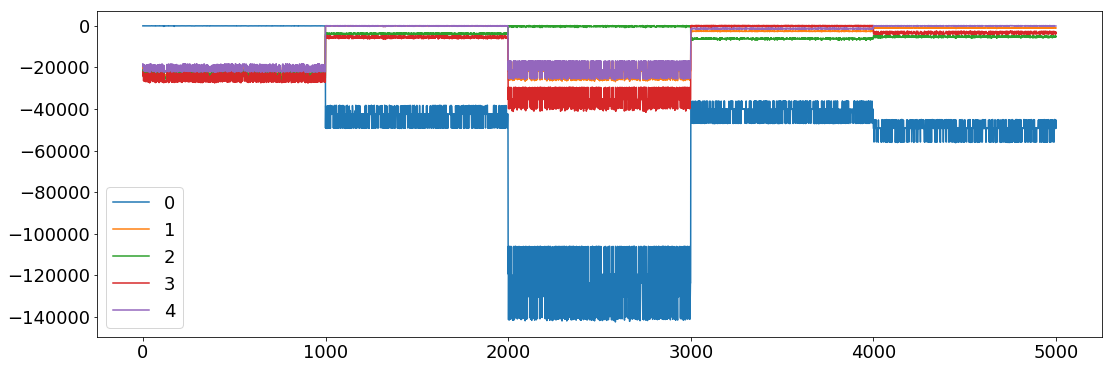

In [202]:
frame_lp.plot()
plt.savefig('Без_меток_состояний.jpeg',dpi = 150)

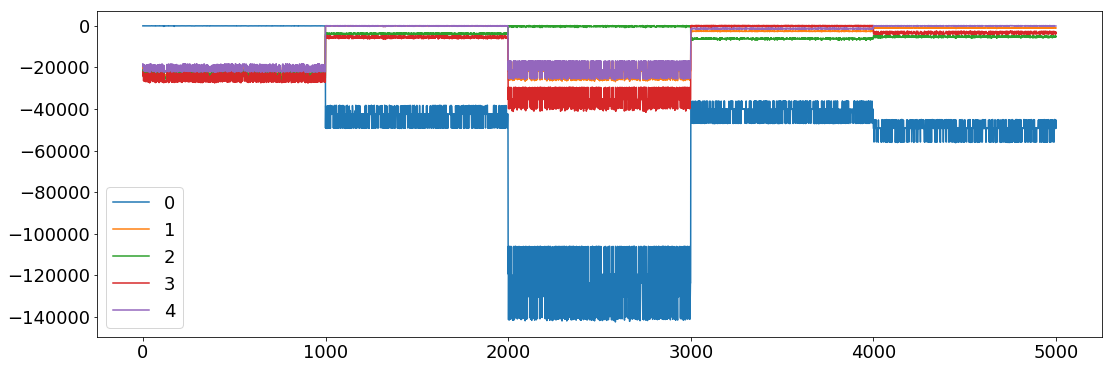

In [203]:
frame_lp.plot()
plt.savefig('C_метками состояний.jpeg',dpi = 150)

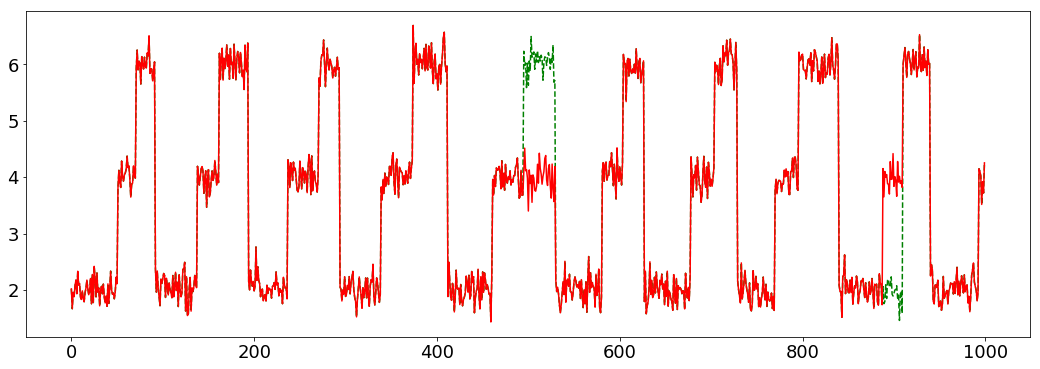

In [204]:
# plt.plot(x_test[349])
# plt.plot(x_test[366],'r')
plt.plot(x_test[376],'g--')
# plt.plot(x_test[346])

plt.plot(x_test[176],'r')

In [205]:
for i in range(2222):
    x_test[i] = signal_manager.generators[0].get_abnormal_signal(); y_test[i] = 0

In [206]:
signal, labels = signal_manager.get_signal_and_path(1)
labels = rename_path_for_train(labels)
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = 4, X = [signal],
                                      labels = [labels], algorithm = 'labeled')


In [207]:
file = open('model.txt','w')
file.write(myutils.print_model_distribution(model))    

Количество параметров распределения больше 1, равно 
Количество параметров распределения больше 1, равно 
Количество параметров распределения больше 1, равно 
Количество параметров распределения больше 1, равно 


701

In [208]:
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = 4, X = [signal])

In [209]:
file.write(myutils.print_model_distribution(model))

Количество параметров распределения больше 1, равно 
Количество параметров распределения больше 1, равно 
Количество параметров распределения больше 1, равно 
Количество параметров распределения больше 1, равно 


706

In [210]:
file.close()

### Эксперимент с PCA

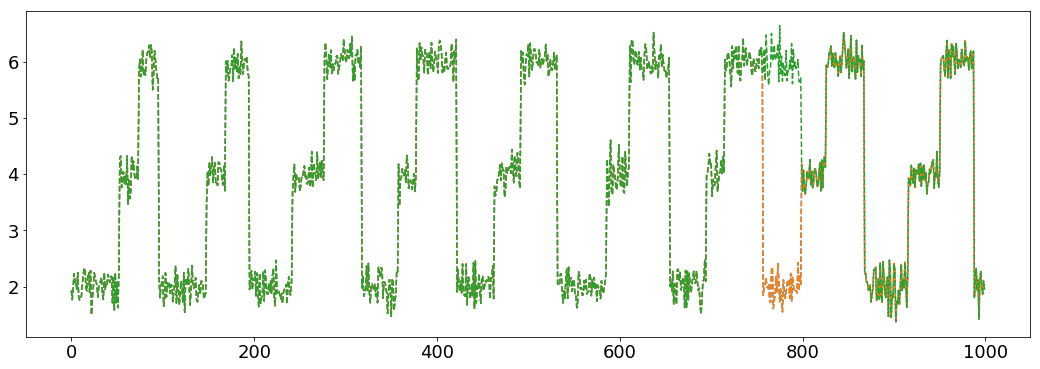

In [15]:
N = len(signal_manager.generators[0].sequence)
x = np.zeros((3,N))
for i in range(3):
    x[i] = signal_manager.generators[0].sequence
    if i == 2:
        x[i] = signal_manager.generators[0].get_abnormal_signal()
    plt.plot(x[i],'--')

In [16]:
pca = PCA(n_components=1)
x_tran = pca.fit_transform(x.T)

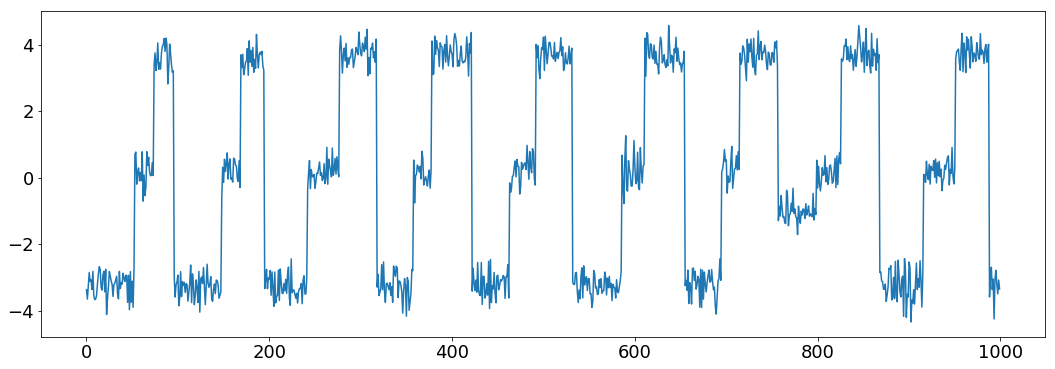

In [17]:
plt.plot(x_tran)

2000


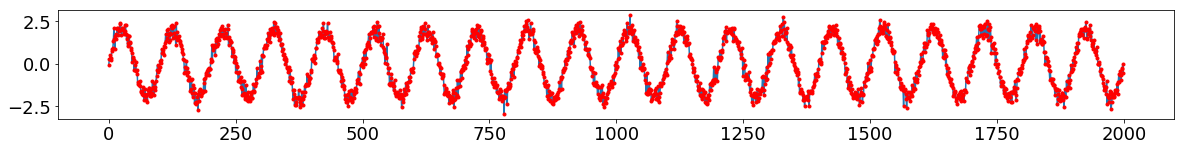

In [32]:
def sinus_signal(A = 2.0,FD = 20000000, N = 2000, F = 200000.0):
    """
    FD = 20000000#частота дискретизации, отсчётов в секунду
    N  = 2000#длина входного массива, N/FD секунд 
    F  = 200000.0#циклическая частота входного сигнала
    """
    w=(2.*np.pi*F/FD)#отсчёт круговой частоты 
    #сгенерируем чистый синусоидальный сигнал с частотой F длиной N
    sin_sig = np.array([A*np.sin(w*t) + np.random.normal(0,A/7,) for t in range(N)])#график сигнала
    return sin_sig

sin_sig = sinus_signal()
fig = plt.figure(figsize=(20,2))
plt.plot(sin_sig)
plt.plot(sin_sig,'r.')

print(len(sin_sig))

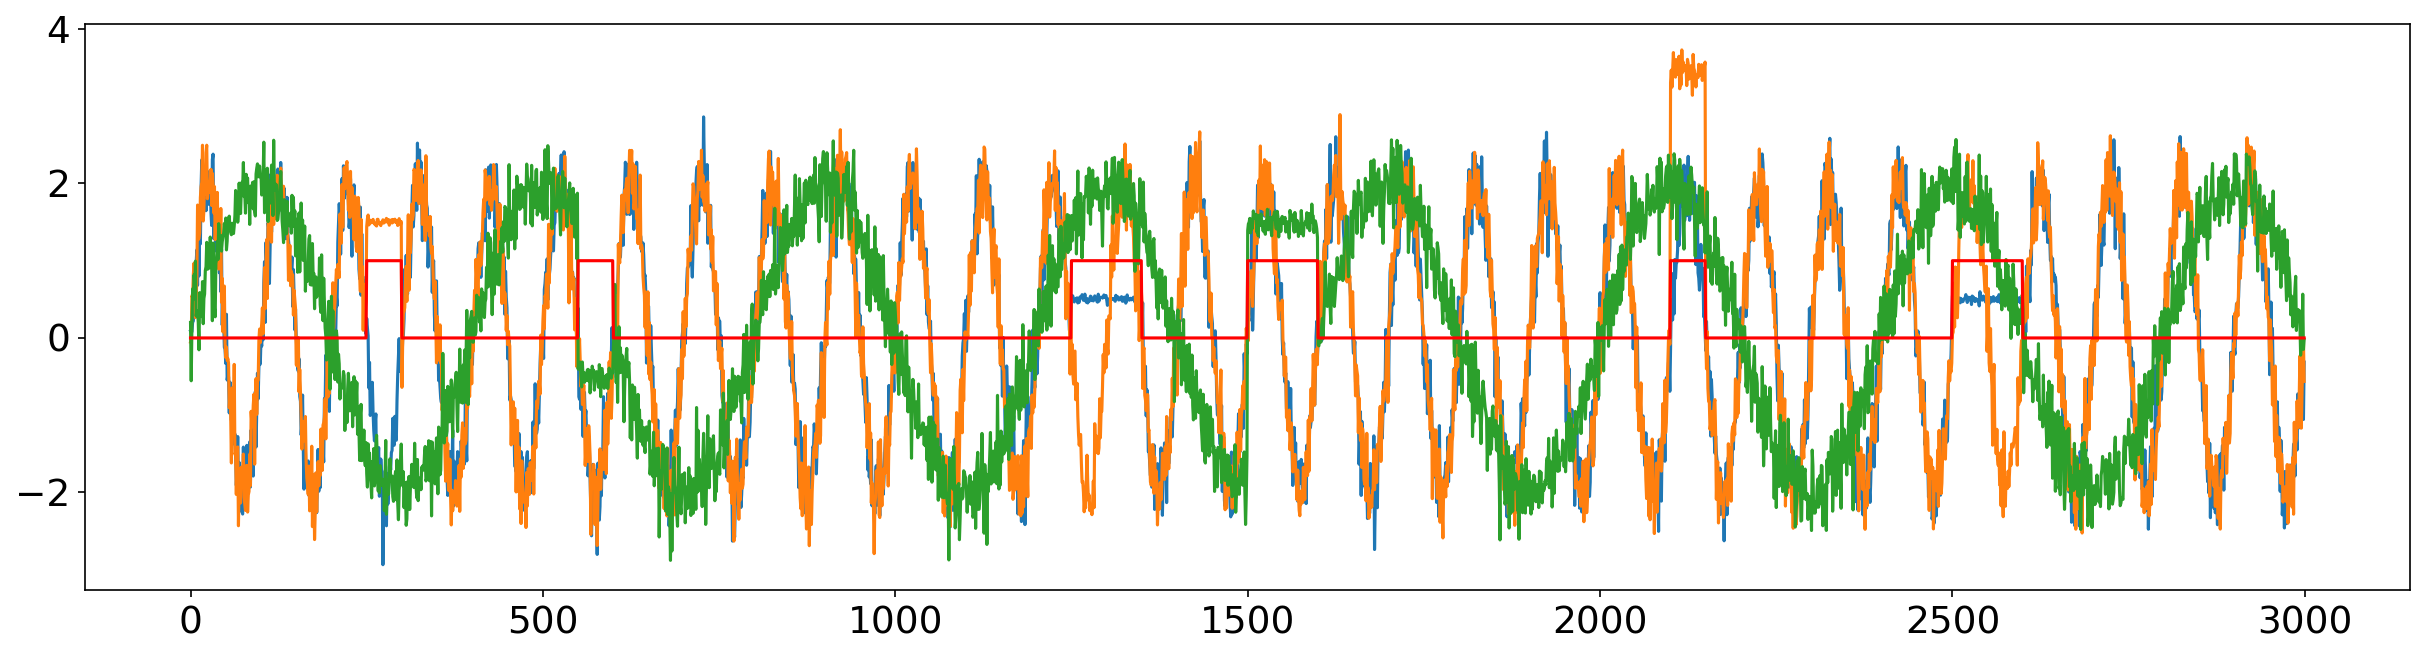

In [57]:
N = 3000
x = np.zeros((3,N))
for i in range(3):
    x[i] = sinus_signal(N=N)
    if i == 2:
        x[i] = sinus_signal(A = 2, F = 50000,N=N)

x[1][250:300] = np.random.normal(1.5,0.03,50)
x[2][550:600] = np.random.normal(-0.5,0.1,50)
x[2][1500:1600] = np.random.normal(1.5,0.1,100)
x[0][1250:1350] = np.random.normal(0.5,0.03,100)

x[0][2500:2600] = np.random.normal(0.5,0.03,100)
x[1][2100:2150] = np.random.normal(3.5,0.15,50)


x_label = np.zeros(N,dtype=np.int)
x_label[250:300] = 1
x_label[550:600] = 1
x_label[1500:1600] = 1
x_label[1250:1350] = 1
x_label[2500:2600] = 1
x_label[2100:2150] = 1

fig = plt.figure(figsize=(20,5),dpi = 150)
for i in range(3):        
    plt.plot(x[i],'')
plt.plot(x_label,'r')

(3, 3000)


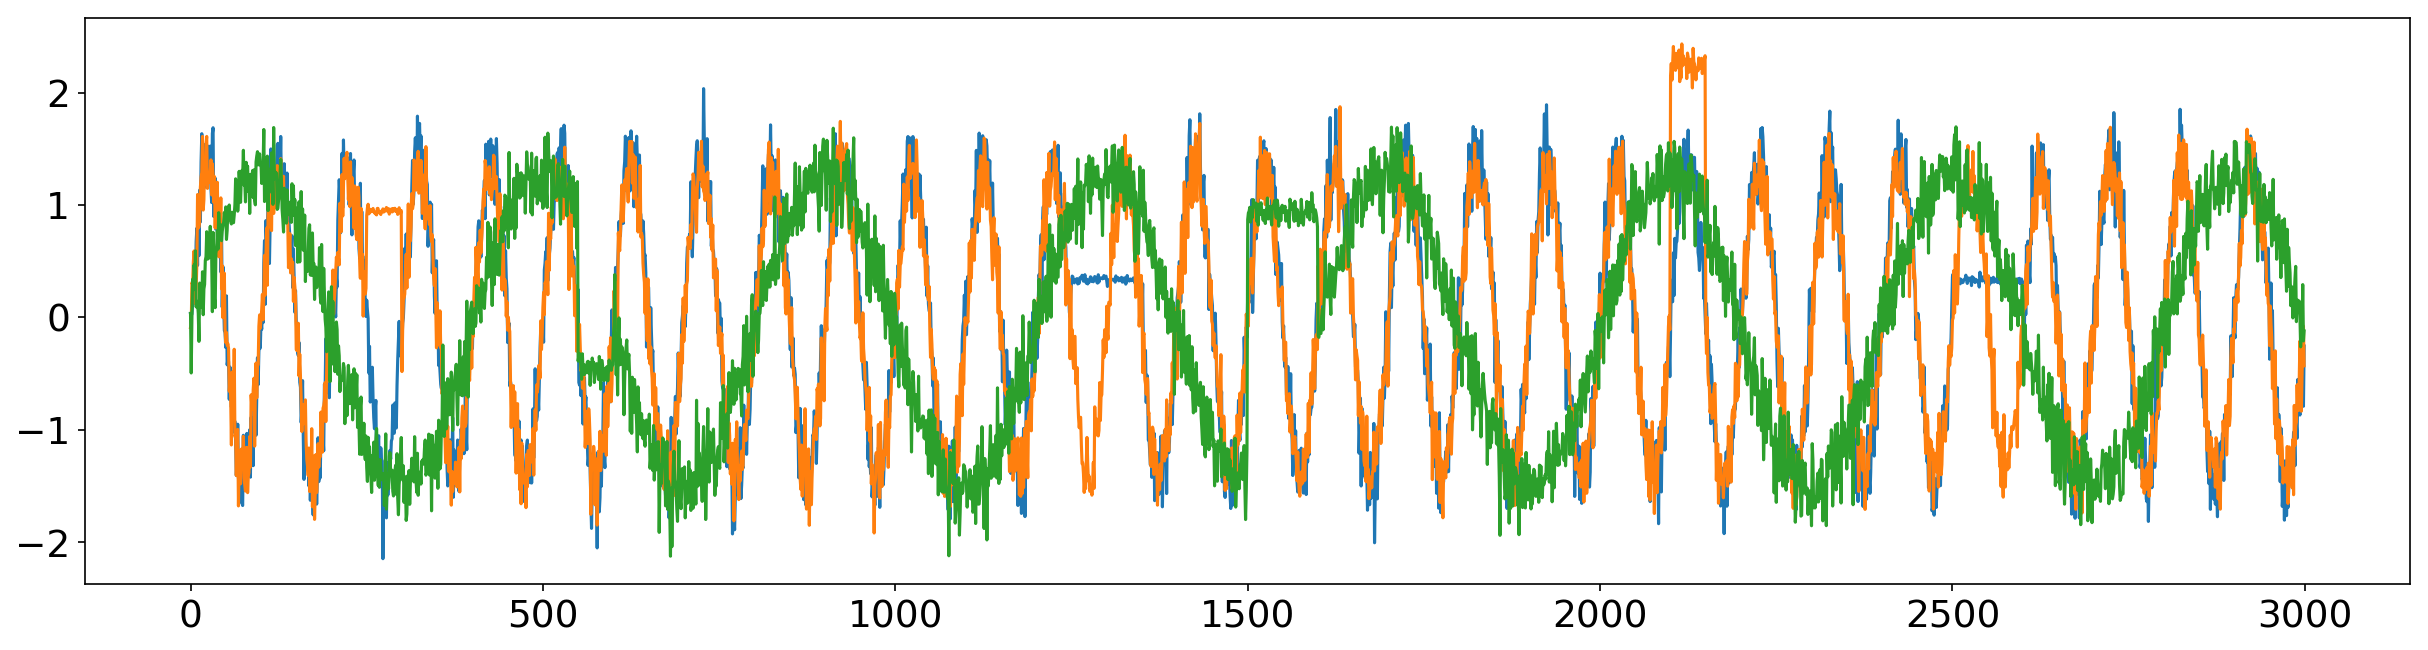

In [58]:
x = scale(x,axis = 1)
print(x.shape)
fig = plt.figure(figsize=(20,5),dpi = 150)
for i in range(3):        
    plt.plot(x[i],'')

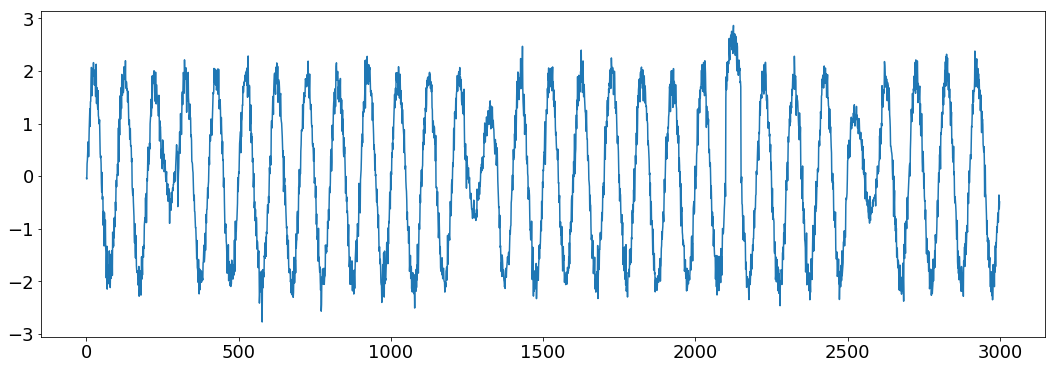

In [59]:
pca = PCA(n_components=1)
x_tran = pca.fit_transform(x.T)
plt.plot(x_tran)

In [60]:
x_train = x_tran[:2000]
x_test = x_tran[2000:]
y_test = myutils.rename_path_for_train(x_label.tolist())[2000:]
label = myutils.rename_path_for_train(x_label.tolist())[:2000]
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = 2, X = [x_train], labels = [label],
                                      algorithm = 'labeled')

# model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = 3, X = [x_train])
model

{
    "class" : "HiddenMarkovModel",
    "name" : "None",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "NormalDistribution",
                "parameters" : [
                    0.011821269873710455,
                    1.3970322776565613
                ],
                "frozen" : false
            },
            "name" : "s0",
            "weight" : 1.0
        },
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "NormalDistribution",
                "parameters" : [
                    -0.15366192220300878,
                

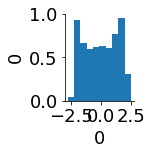

In [61]:
import seaborn as sns
sns.pairplot(pd.DataFrame(x_train),)

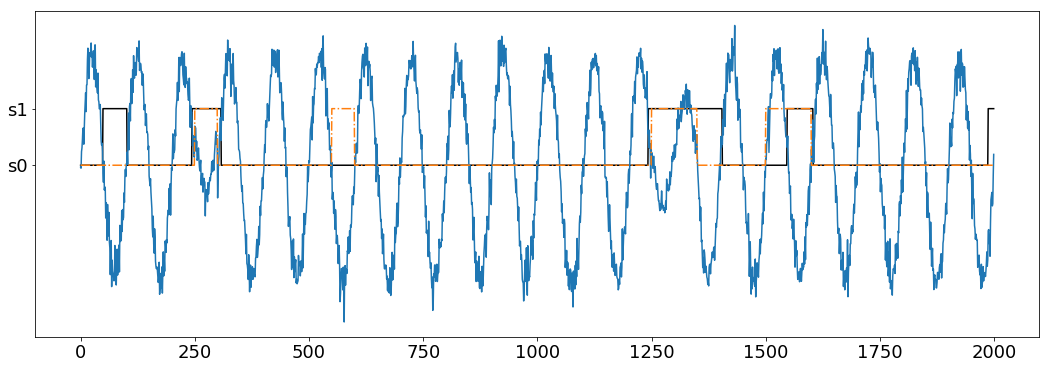

In [62]:
y_pred = model.predict(x_train)
plt.plot(y_pred,'black')
plt.plot(x_train)
plt.plot(label,'-.')

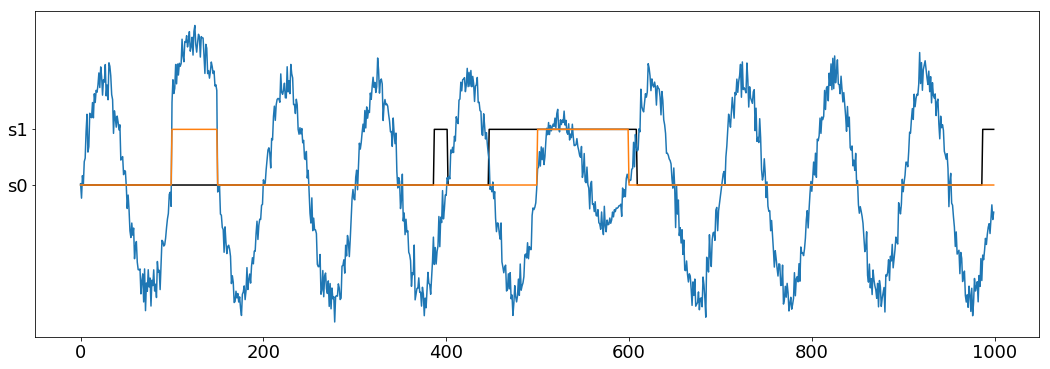

In [63]:
y_pred = model.predict(x_test)
plt.plot(y_pred,'black')
plt.plot(x_test)
plt.plot(y_test)

(3, 3000)


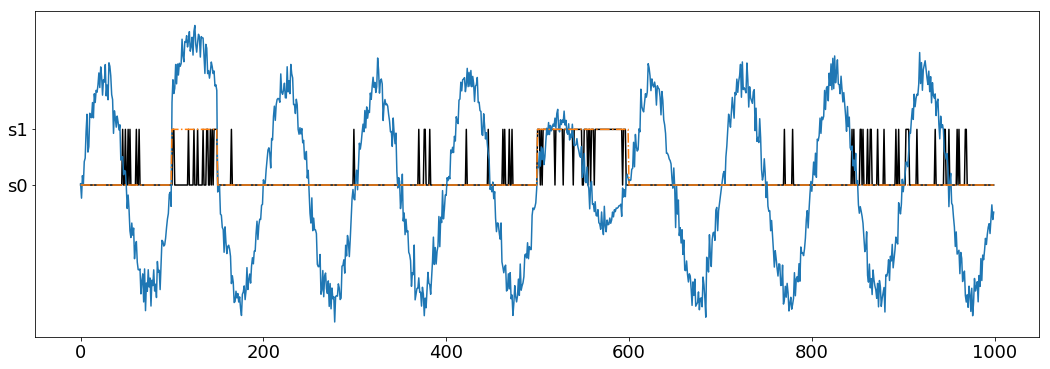

In [64]:
from sklearn.tree import DecisionTreeClassifier
print(x.shape)
model = DecisionTreeClassifier().fit(x.T[:2000], x_label[:2000])
y_pred = model.predict(x.T[2000:])
plt.plot(y_pred,'black')
plt.plot(x_test)
plt.plot(y_test,'-.')

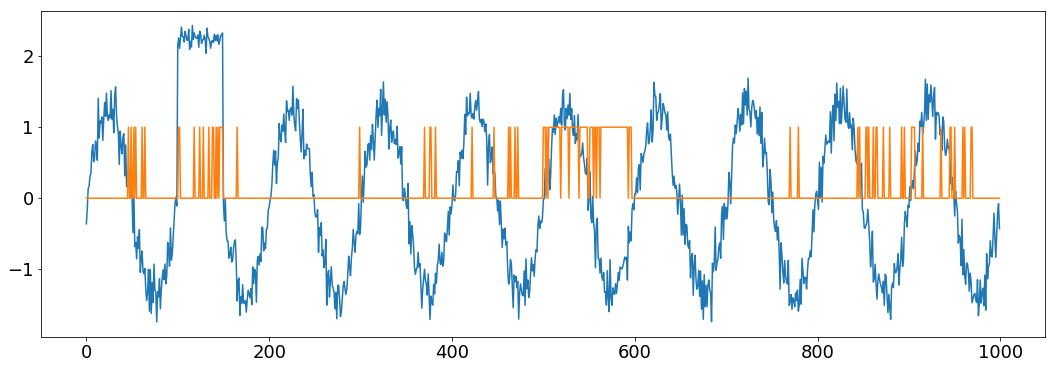

In [65]:
plt.plot(x[1][2000:])
plt.plot(y_pred)

(3, 3000)


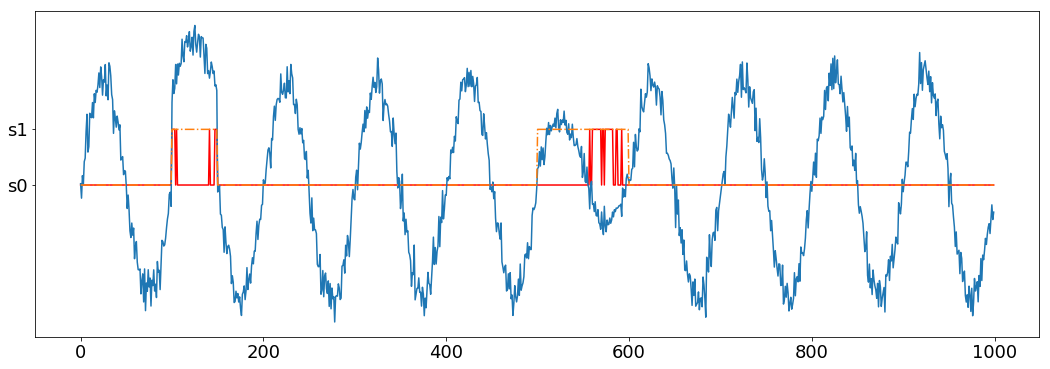

In [66]:
from sklearn.svm import SVC
print(x.shape)
model = SVC(C=0.3).fit(x.T[:2000], x_label[:2000])
y_pred = model.predict(x.T[2000:])

plt.plot(y_pred,'r')
plt.plot(x_test)
plt.plot(y_test,'-.')

[  0.         -31.03814525   3.41909763]
g  [0.21       0.35       0.05       0.81130368 0.29590053 0.45983421]
b [0.61       0.45983421 0.05      ]


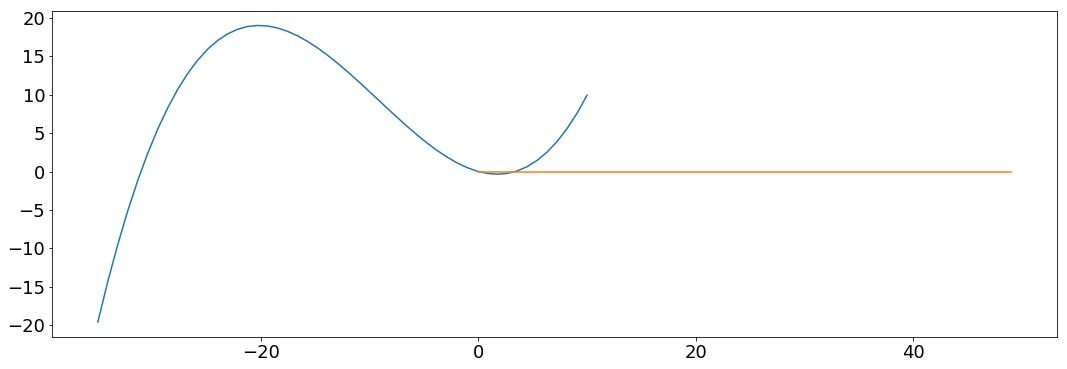

In [67]:
from scipy import optimize
def f(x):
    return 0.003675*x**3 + 0.1015*x**2 - 0.39*x
z = np.linspace(-35,10)
plt.plot(z,f(z))
plt.plot([0]*len(z))

ans = optimize.root(f,[0,-100,120],);
print(ans.x)
l = ans.x[2]
g = np.zeros((6,))
g[0:3] = [0.21, 0.35, 0.05]

b = np.zeros((3,))
b[0] = np.sum(g)

g[3] = g[0] + g[1] + l*g[0]*g[1]
g[4] = g[0] + g[2] + l*g[0]*g[2]
g[5] = g[1] + g[2] + l*g[1]*g[2]

b[1] = g[5]
b[2] = g[2]

print('g ',g)
print('b', b)
h = np.array([0.7, 0.4, 0.3])

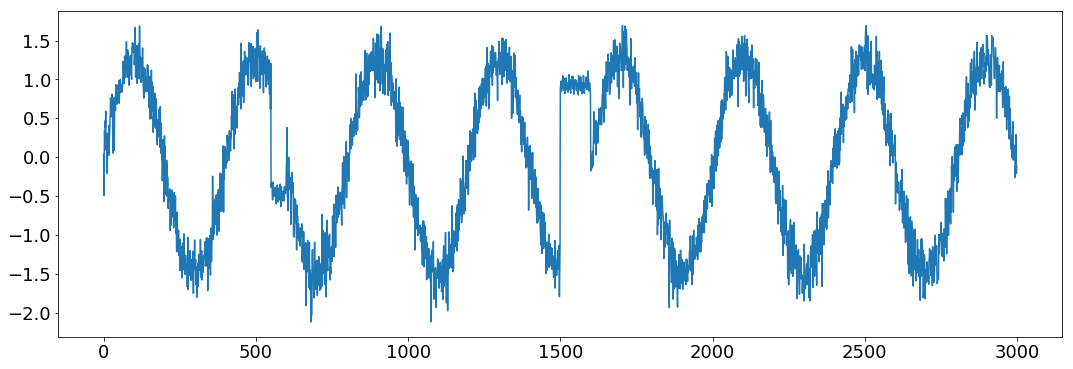

In [71]:
plt.plot(x[2])